Getting and knowing Data

In [2]:
import pandas as pd
import numpy as np

step 1: import dataset

In [3]:
da = pd.read_csv("chipotle.tsv",sep="\t") #sep=\t file tsv ngăn cách bởi tab

In [4]:
da.head(5) #in ra 5 dòng đầu tiên

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


step 2: dataset overview

In [5]:
da.shape # trả về kiểu tupple số lượng hàng,cột

(4622, 5)

In [ ]:
# lấy thông tin về dataframe
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [ ]:
# 
da.index

RangeIndex(start=0, stop=4622, step=1)

In [ ]:
# thống kê mô tả về dataframe
# std là độ lệch chuẩn
# 25%: giá trị nhỏ hơn hoặc bằng giá trị này chiếm 25% tổng số giá trị
# 50%: giá trị nhỏ hơn hoặc bằng giá trị này chiếm 50% tổng số giá trị (trung vị)
# 75%: giá trị nhỏ hơn hoặc bằng giá trị này chiếm 75% tổng số giá trị
da.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [9]:
#thống kê tất cả thêm include ="all"
da.describe(include = "all")

,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622,3376,4622
unique,NaN,NaN,50,1043,78
top,NaN,NaN,Chicken Bowl,[Diet Coke],$8.75
freq,NaN,NaN,726,134,730
mean,927.254868,1.075725,NaN,NaN,NaN
std,528.890796,0.410186,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,477.250000,1.000000,NaN,NaN,NaN
50%,926.000000,1.000000,NaN,NaN,NaN
75%,1393.000000,1.000000,NaN,NaN,NaN


In [10]:
da.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


lo & iloc

In [ ]:
# lọc các dòng có quantity >=5
da.loc[da.quantity >= 5]

,order_id,quantity,item_name,choice_description,item_price
2441,970,5,Bottled Water,NaN,$7.50
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,$44.25
3599,1443,7,Bottled Water,NaN,$10.50
3887,1559,8,Side of Chips,NaN,$13.52
4152,1660,10,Bottled Water,NaN,$15.00


In [ ]:
# lọc các dòng có choice_description là [Apple] và order_id >=500
da.loc[(da.choice_description == "[Apple]") & (da.order_id >= 500)]

,order_id,quantity,item_name,choice_description,item_price
1706,690,1,Nantucket Nectar,[Apple],$3.39
2381,947,1,Nantucket Nectar,[Apple],$3.39
2818,1118,1,Nantucket Nectar,[Apple],$3.39
2853,1133,1,Nantucket Nectar,[Apple],$3.39


In [ ]:
# lấy 4 dòng đầu tiên
da.iloc[0:4]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39


In [ ]:
# lấy dòng thứ 3, bỏ qua 2 cột cuối cùng
da.iloc[2,:-2]

order_id                    1
quantity                    1
item_name    Nantucket Nectar
Name: 2, dtype: object

data manipulation

In [15]:
#xem kiểu dữ liệu của các cột
da.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [16]:
#xem kiểu dữ liệu của 1 cột
da.item_price.dtype

dtype('O')

Apply()

In [ ]:
#xóa bỏ dấu $ trong cột item_price
# lambda là hàm ẩn danh
# sử dụng hàm apply để áp dụng hàm cho từng phần tử trong cột
# replace để thay thế ký tự
da.item_price.apply(lambda x : x.replace("$",""))

0        2.39 
1        3.39 
2        3.39 
3        2.39 
4       16.98 
         ...  
4617    11.75 
4618    11.75 
4619    11.25 
4620     8.75 
4621     8.75 
Name: item_price, Length: 4622, dtype: object

In [ ]:
#chuyển từ type object về float, lúc này chỉ là xóa bỏ $ và chuyển thành type nhất thời
# sử dụng float() để chuyển về float nhưng vẫn chưa lưu vào dataframe
da.item_price.apply(lambda x : float(x.replace("$","")))

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [19]:
#kiểm tra dữ liệu (chưa có gì thay đổi)
da.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
#để thay đổi dữ liệu của data, ta gán nó vào 1 biến mới
# lưu ý: thao tác này không làm thay đổi dữ liệu gốc
# chuyển từ type object về float và lưu vào dataframe
da.item_price = da.item_price.apply(lambda x : float(x.replace("$","")))

In [21]:
#kiểm tra lại data cột item_price
da.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [ ]:
#Tạo cột mới và truyền giá trị vào (ở đây tính toán giá trị tổng tiền)
# giá trị tổng tiền = số lượng * giá tiền 1 món
da["total_price"] = da["quantity"]*da["item_price"]

In [23]:
da.head()

,order_id,quantity,item_name,choice_description,item_price,total_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [ ]:
#how much was the revenue for period in the dataset?
# tính tổng doanh thu trong cột total_price
revenue = da["total_price"].sum()
print(revenue)

39237.02


group

In [ ]:
# which was the most order item?
gr = da.groupby("item_name")["quantity"].sum() # nhóm theo item_name và tính tổng quantity
gr.sort_values(ascending=False).head() # sắp xếp giảm dần và lấy 5 giá trị đầu

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

In [26]:
#cách sử dụng hàm counts
da.item_name.value_counts().head()

item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: count, dtype: int64

In [ ]:
#kiểm tra xem có bao nhiêu món hàng khác nhau
da.item_name.value_counts().count() # trả về số lượng mục khác nhau

np.int64(50)

In [ ]:
da.item_name.nunique() # trả về số lượng mục khác nhau

50

Standard deviation: độ lệch chuẩn

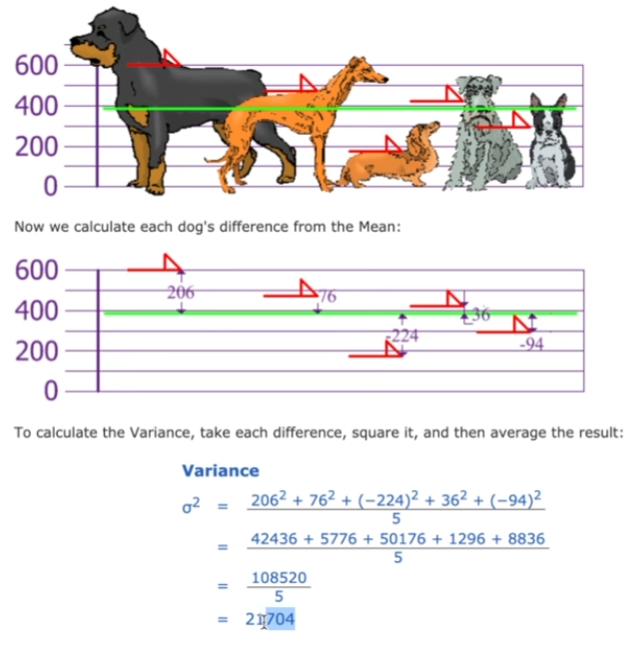
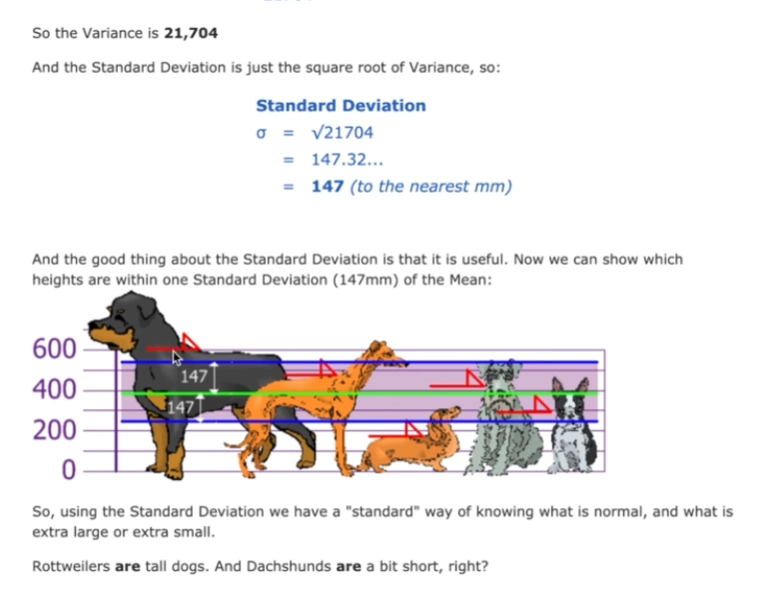